In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
df=pd.read_csv('/content/gdrive/My Drive/WELFake_Dataset(1).csv')

In [4]:
# drop Nan values
df=df.dropna()

In [5]:
X=df.drop('label',axis=1)

In [6]:
y=df['label']

In [7]:
y.value_counts()

1    36509
0    35028
Name: label, dtype: int64

In [8]:
X.shape

(71537, 3)

In [9]:
y.shape

(71537,)

In [10]:
import tensorflow as tf

In [11]:
tf.__version__

'2.8.0'

In [12]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [13]:
### Vocabulary size
voc_size=10000

Onehot Representation

In [14]:
messages=X.copy()

In [15]:
messages.reset_index(inplace=True)

In [16]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
66537
66538
66539
66540
66541
66542
66543
66544
66545
66546
66547
66548
66549
66550
66551
66552
66553
66554
66555
66556
66557
66558
66559
66560
66561
66562
66563
66564
66565
66566
66567
66568
66569
66570
66571
66572
66573
66574
66575
66576
66577
66578
66579
66580
66581
66582
66583
66584
66585
66586
66587
66588
66589
66590
66591
66592
66593
66594
66595
66596
66597
66598
66599
66600
66601
66602
66603
66604
66605
66606
66607
66608
66609
66610
66611
66612
66613
66614
66615
66616
66617
66618
66619
66620
66621
66622
66623
66624
66625
66626
66627
66628
66629
66630
66631
66632
66633
66634
66635
66636
66637
66638
66639
66640
66641
66642
66643
66644
66645
66646
66647
66648
66649
66650
66651
66652
66653
66654
66655
66656
66657
66658
66659
66660
66661
66662
66663
66664
66665
66666
66667
66668
66669
66670
66671
66672
66673
66674
66675
66676
66677
66678
66679
66680
66681
66682
66683
66684
66685
66686
66687
66688
66689
66690
66691
66692
66693
66694
6

In [18]:
display(corpus)

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti bid',
 'satan russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trump russia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl alt right nazi internet',
 'may brexit offer would hurt cost eu citizen eu parliament',
 'schumer call trump appoint offici overse puerto rico relief',
 'watch hilari ad call question health age clinton crime famili boss',
 'chang expect espn polit agenda despit huge subscrib declin breitbart'

In [19]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[6253, 3674, 3892, 980, 1221, 5690, 2706, 3531, 6484, 9199, 473, 9170],
 [8967,
  4508,
  3380,
  3083,
  2879,
  2227,
  1439,
  1750,
  1417,
  6592,
  5481,
  4484,
  9074,
  9170],
 [3251, 1329, 2745, 3788, 5443, 9076, 7023, 3403, 6564, 8485, 1181, 1127],
 [8815, 9028, 5601, 3269, 8607, 6813, 9327, 6704, 4497, 7229, 5482],
 [1621, 7023, 1502, 1383, 3751, 7041, 6851, 2650, 1502],
 [7865, 6809, 783, 3688, 2562, 895, 4972, 2955, 4841, 6411, 3847],
 [7888, 619, 9025, 104, 9028, 4113, 9076, 2564, 6819, 9170],
 [9139,
  3898,
  8584,
  4434,
  6246,
  7012,
  8016,
  1685,
  2144,
  9139,
  4588,
  9083,
  5689,
  5953,
  9170],
 [6465, 5124, 862, 7916, 9694, 8693, 5087, 5124],
 [9091, 3930, 3211, 8789, 5006, 4884, 1268, 3322],
 [7423, 5785, 9537, 3261, 6018, 3710, 9314, 2605, 9314, 9021],
 [7958, 1850, 104, 3409, 9377, 3577, 793, 2801, 5422],
 [2721, 8841, 4485, 1850, 9800, 357, 7648, 8257, 9845, 8695, 4421],
 [8269, 1110, 6763, 8987, 5093, 4283, 2641, 6592, 9264, 2295],
 [872, 4385, 5

Embedding Representation

In [20]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 9199  473 9170]
 [   0    0    0 ... 4484 9074 9170]
 [   0    0    0 ... 8485 1181 1127]
 ...
 [   0    0    0 ... 5861 9881 2115]
 [   0    0    0 ... 1824 1693  169]
 [   0    0    0 ... 6710 8257 4662]]


In [21]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0, 6253, 3674, 3892,
        980, 1221, 5690, 2706, 3531, 6484, 9199,  473, 9170], dtype=int32)

In [22]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            400000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            400000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
len(embedded_docs),y.shape

(71537, (71537,))

In [25]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [26]:
X_final.shape,y_final.shape

((71537, 20), (71537,))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=42)

# Model Training for LSTM

In [42]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
783/783 [==============================] - 6s 7ms/step - loss: 0.0281 - accuracy: 0.9900 - val_loss: 0.5813 - val_accuracy: 0.8945
Epoch 2/10
783/783 [==============================] - 7s 9ms/step - loss: 0.0231 - accuracy: 0.9920 - val_loss: 0.6833 - val_accuracy: 0.8901
Epoch 3/10
783/783 [==============================] - 8s 10ms/step - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.7465 - val_accuracy: 0.8912
Epoch 4/10
783/783 [==============================] - 6s 7ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.7324 - val_accuracy: 0.8919
Epoch 5/10
783/783 [==============================] - 5s 6ms/step - loss: 0.0131 - accuracy: 0.9961 - val_loss: 0.7690 - val_accuracy: 0.8906
Epoch 6/10
783/783 [==============================] - 5s 6ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.8203 - val_accuracy: 0.8894
Epoch 7/10
783/783 [==============================] - 5s 6ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.9022 - val_accuracy: 0.8882
Epoch

# Model Training for Bi-Directional LSTM

In [43]:
history1=model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
783/783 [==============================] - 8s 10ms/step - loss: 0.0266 - accuracy: 0.9906 - val_loss: 0.5742 - val_accuracy: 0.8949
Epoch 2/10
783/783 [==============================] - 11s 13ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.6253 - val_accuracy: 0.8939
Epoch 3/10
783/783 [==============================] - 7s 9ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 0.6930 - val_accuracy: 0.8921
Epoch 4/10
783/783 [==============================] - 7s 9ms/step - loss: 0.0157 - accuracy: 0.9946 - val_loss: 0.6936 - val_accuracy: 0.8886
Epoch 5/10
783/783 [==============================] - 7s 9ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.8050 - val_accuracy: 0.8920
Epoch 6/10
783/783 [==============================] - 7s 9ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.7237 - val_accuracy: 0.8942
Epoch 7/10
783/783 [==============================] - 7s 9ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.7503 - val_accuracy: 0.8914
Epo

# LSTM Performance Metrics And Accuracy

In [30]:
y_pred=model.predict(X_test)

In [31]:
import numpy as np
y_pred=np.round(abs(y_pred))
y_pred=y_pred.astype('int64')

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

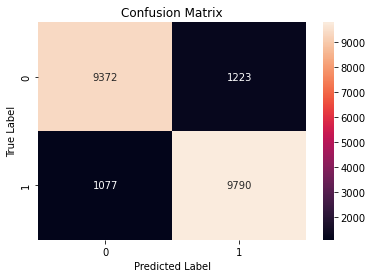

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.892833845867114

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     10595
           1       0.89      0.90      0.89     10867

    accuracy                           0.89     21462
   macro avg       0.89      0.89      0.89     21462
weighted avg       0.89      0.89      0.89     21462



# Bi-Directional Lstm Performance metrics and Accuracy

In [36]:
y_pred1=model1.predict(X_test)

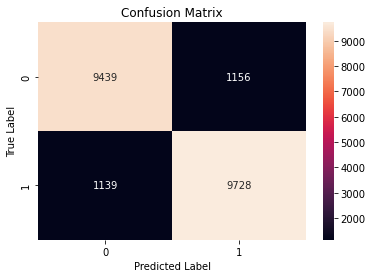

In [37]:
import numpy as np
y_pred1=np.round(abs(y_pred1))
y_pred1=y_pred1.astype('int64')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.8930668157674029

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     10595
           1       0.89      0.90      0.89     10867

    accuracy                           0.89     21462
   macro avg       0.89      0.89      0.89     21462
weighted avg       0.89      0.89      0.89     21462



#comparison graph

Text(0, 0.5, 'Evaluation Parameter Values for each Metric')

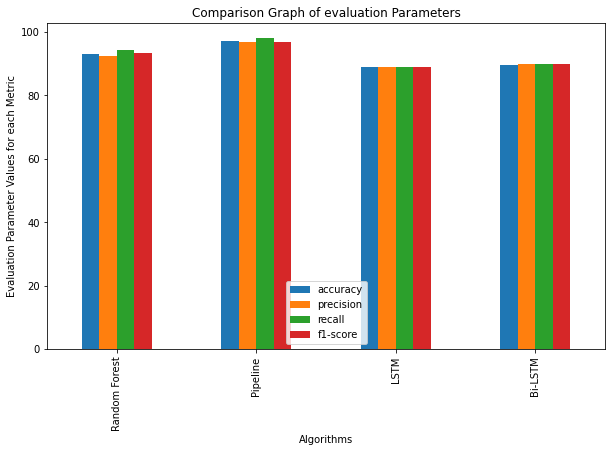

In [53]:
import pandas as pd
import matplotlib.pyplot as plt 
plotdata = pd.DataFrame({

    "accuracy":[93.2,97.08,89.07,89.60],

    "precision":[92.5,97,89,90.0],

    "recall":[94.4,98,89,90.0],
    
    "f1-score":[93.5,97,89,90.0]},

    index=["Random Forest", "Pipeline", "LSTM", "Bi-LSTM"])

plotdata.plot(kind="bar",figsize=(10, 6))

plt.title("Comparison Graph of evaluation Parameters")

plt.xlabel("Algorithms")

plt.ylabel("Evaluation Parameter Values for each Metric")
            

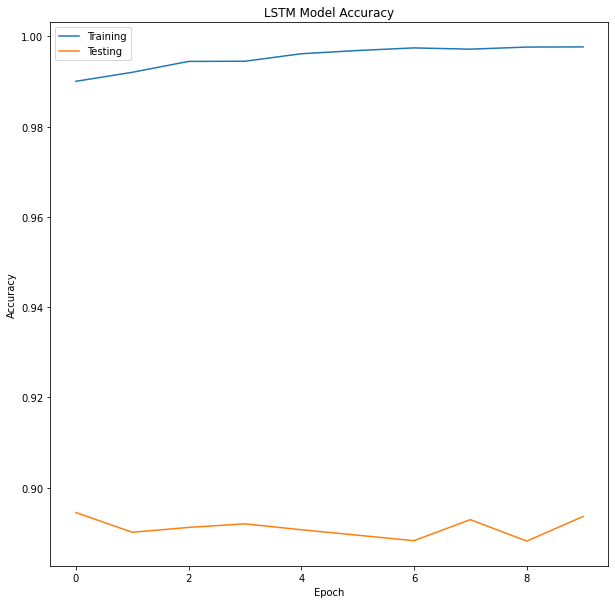

In [46]:
plt.figure(figsize=(10,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('model.png')
plt.show()

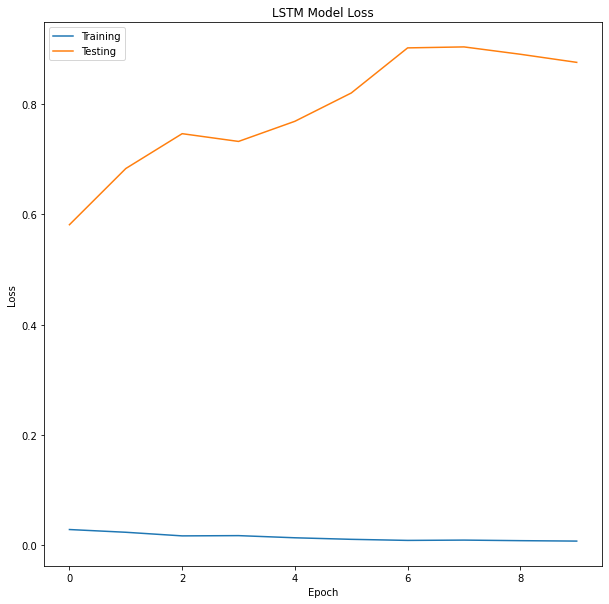

In [51]:
plt.figure(figsize=(10,10))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('model.png')
plt.show()

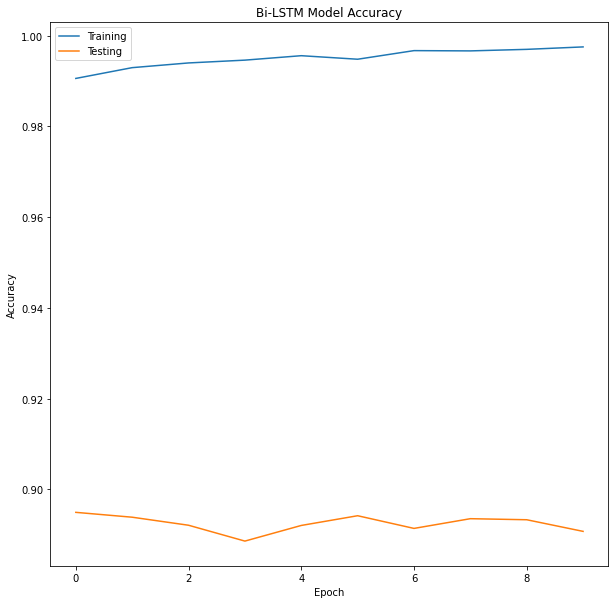

In [52]:
plt.figure(figsize=(10,10))

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.title('Bi-LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('model1.png')
plt.show()

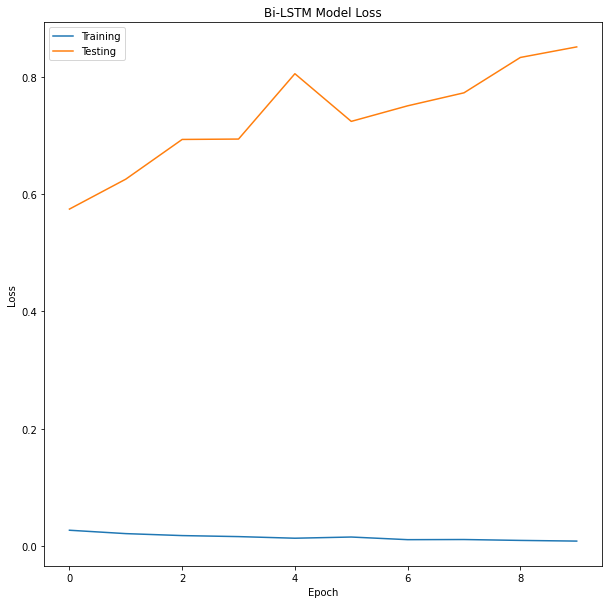

In [50]:
plt.figure(figsize=(10,10))

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('Bi-LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('model1.png')
plt.show()